In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from database.utils import get_train_test_data
from feature_extraction.transformers import *
from evaluation.metrics import class_report
from nlp.tfidf import *

import numpy as np
import pandas as pd
import pprint
import time
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer

sns.set()
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
train_test_data = get_train_test_data()

In [ ]:
cols_target = ['label_pa', 'label_sb', 'label_sleep']
print('Total rows in test is {}'.format(len(X_test)))
print('Total rows in train is {}'.format(len(X_train)))
print(y_train[cols_target].sum())

sleep
sedentary_behaviour
physical_activity


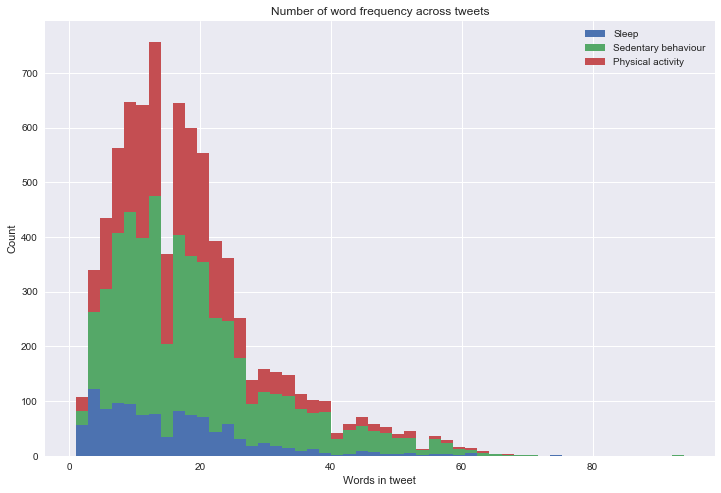

In [3]:
plt.figure(figsize=(12, 8))
values = []
for Xr_train, y_train, Xr_test, y_test, indicator in train_test_data:
    print(indicator)
    t = NumWordExtractor()
    val = t.fit_transform(Xr_train, y_train)
    values.append(val)
    
plt.hist(values, bins=50, stacked=True) 
plt.title("Number of word frequency across tweets")
plt.xlabel("Words in tweet")
plt.ylabel("Count")
plt.legend(("Sleep", "Sedentary behaviour", "Physical activity"))

sleep
sedentary_behaviour
physical_activity


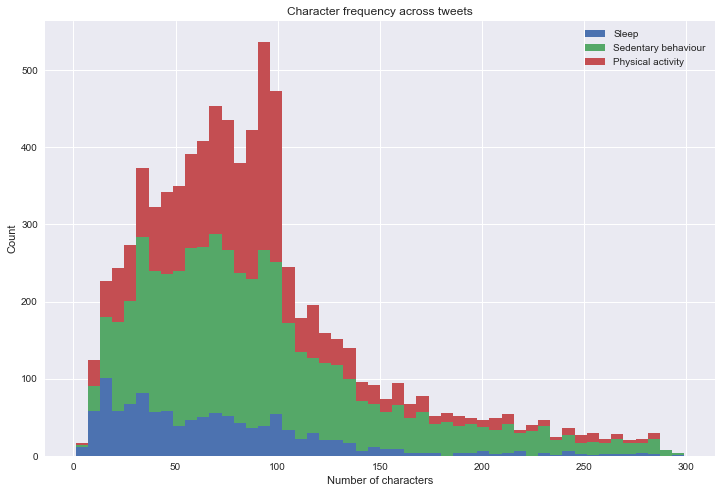

In [4]:
plt.figure(figsize=(12, 8))
values = []
for Xr_train, y_train, Xr_test, y_test, indicator in train_test_data:
    print(indicator)
    t = CharLengthExtractor()
    val = t.fit_transform(Xr_train, y_train)
    values.append(val)
    
plt.hist(values, bins=50, stacked=True) 
plt.title("Character frequency across tweets")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.legend(("Sleep", "Sedentary behaviour", "Physical activity"))

sleep
sedentary_behaviour
physical_activity


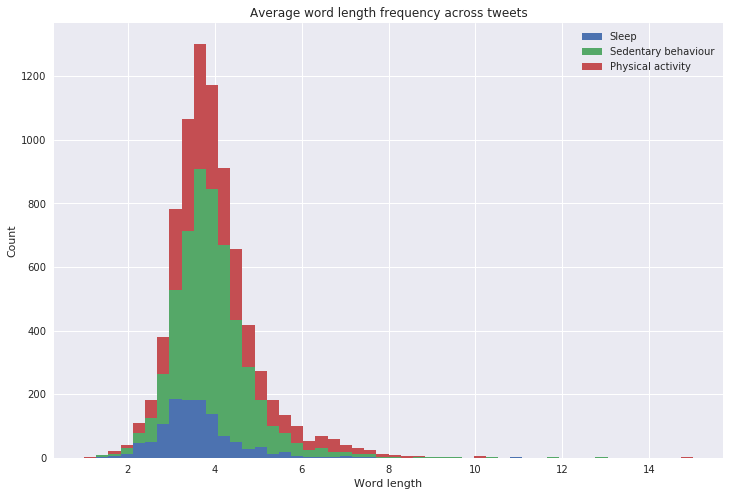

In [48]:
plt.figure(figsize=(12, 8))
values = []
for Xr_train, y_train, Xr_test, y_test, indicator in train_test_data:
    print(indicator)
    t = AverageWordLengthExtractor()
    val = t.fit_transform(Xr_train, y_train)
    values.append(val)
    
plt.hist(values, bins=50, stacked=True) 
plt.title("Average word length frequency across tweets")
plt.xlabel("Word length")
plt.ylabel("Count")
plt.legend(("Sleep", "Sedentary behaviour", "Physical activity"))

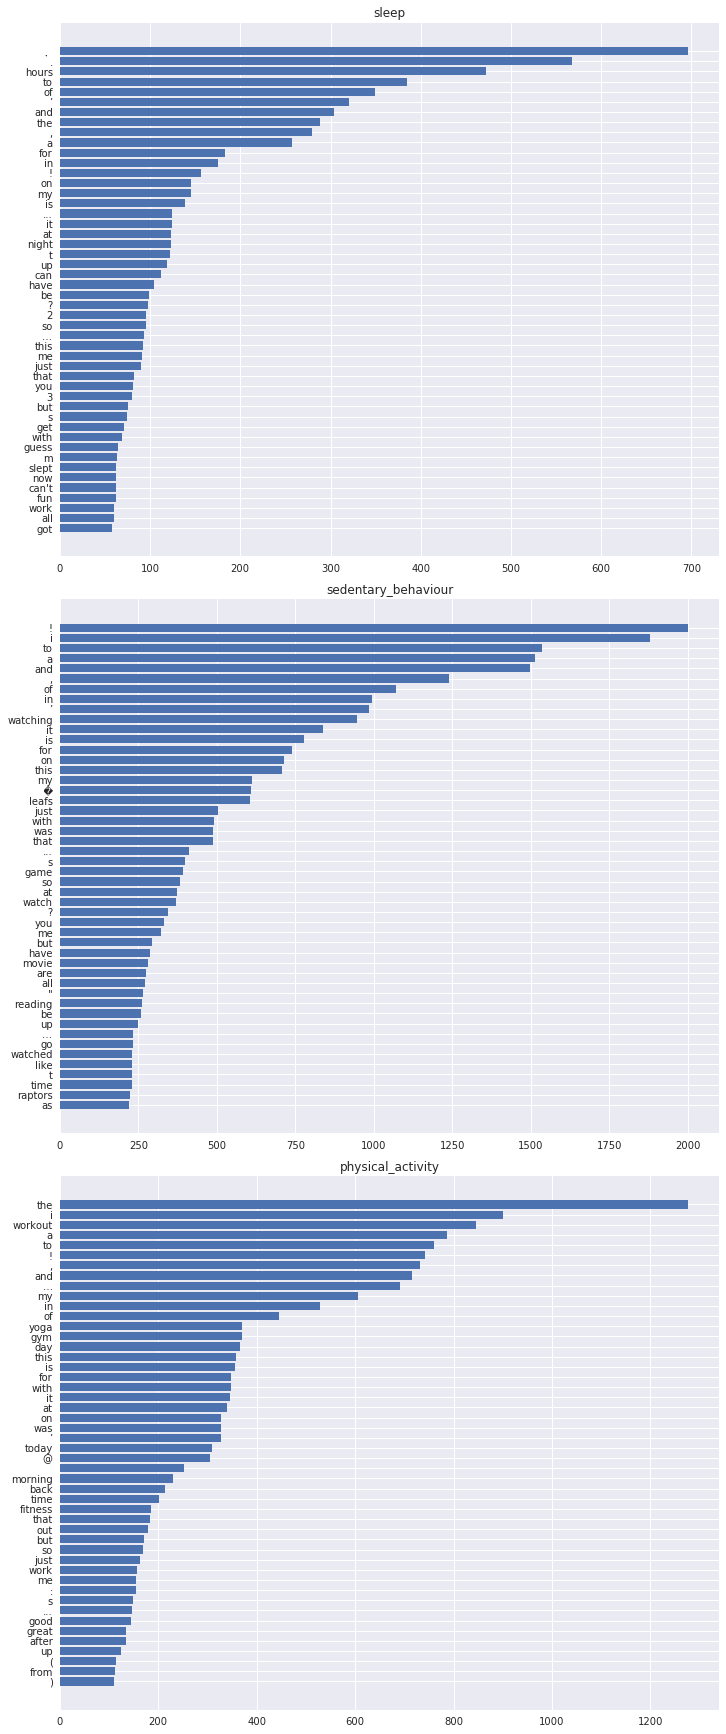

In [110]:
f, ax = plt.subplots(3, 1, figsize=(10, 24))
for idx, (Xr_train, y_train, Xr_test, y_test, indicator) in enumerate(train_test_data):
    all_words = Xr_train.str.split(expand=True).unstack().value_counts()
    x = all_words.index.values[2:50][::-1]
    y = all_words.values[2:50][::-1]
    ax[idx].barh([i for i in range(len(x))], y)
    ax[idx].set_title(indicator)
    ax[idx].set_yticks([i for i in range(len(x))])
    ax[idx].set_yticklabels(x)#, rotation=90)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)    

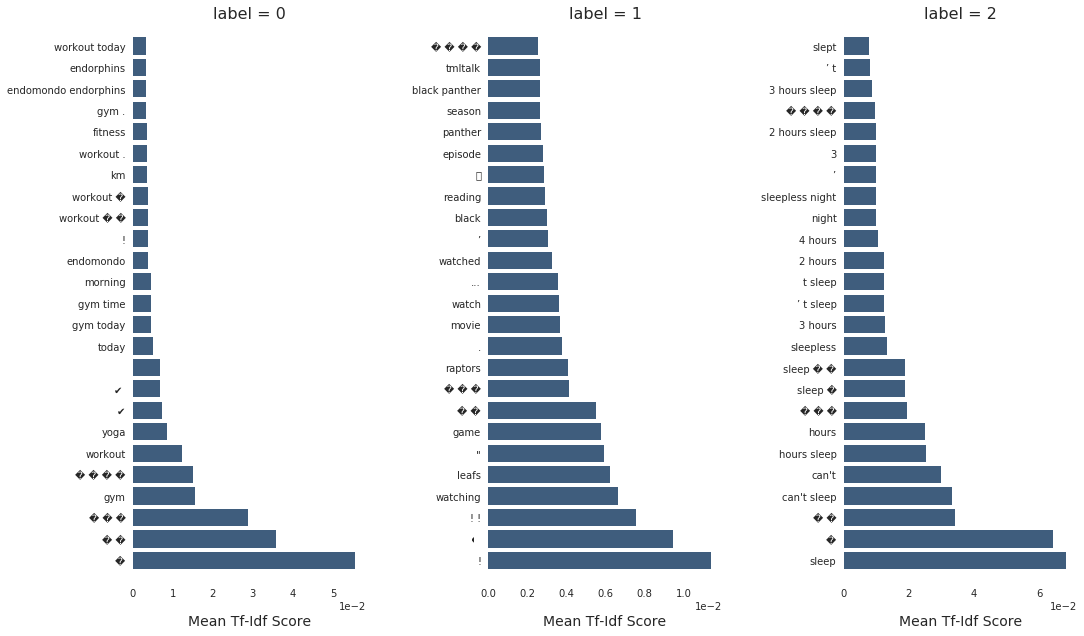

In [259]:
X_train, y_train, X_test, y_test = get_train_test_data(merge=True)

nltk_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

vectorizer = TfidfVectorizer(ngram_range=(1,4),  
                             lowercase=False,
                             tokenizer=nltk_tokenizer.tokenize,
                             stop_words='english')

X = vectorizer.fit_transform(X_train)

features = vectorizer.get_feature_names()
idx, labels = np.where(y_train)
tfidf_df = top_feats_by_class(X[idx], labels, features)

plot_tfidf_classfeats_h(tfidf_df)